<a href="https://colab.research.google.com/github/pallesairamgoud/Customer-Churn-Analysis/blob/main/Telco_Customer_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Clean the data

In [5]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

Run visualization code blocks
1.Churn Count Plot

<ipython-input-6-503426346007>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


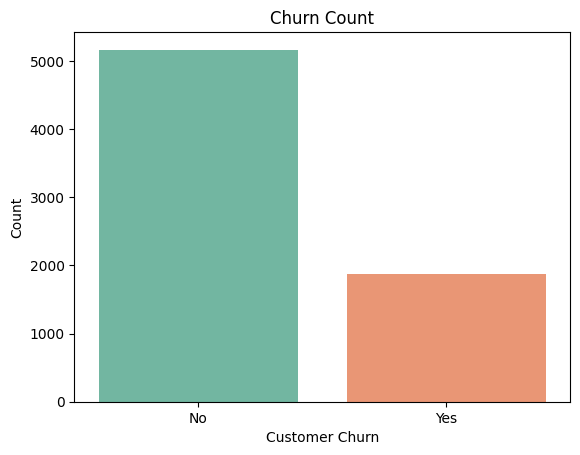

In [6]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Count')
plt.xlabel('Customer Churn')
plt.ylabel('Count')
plt.show()

2. Churn by Gender

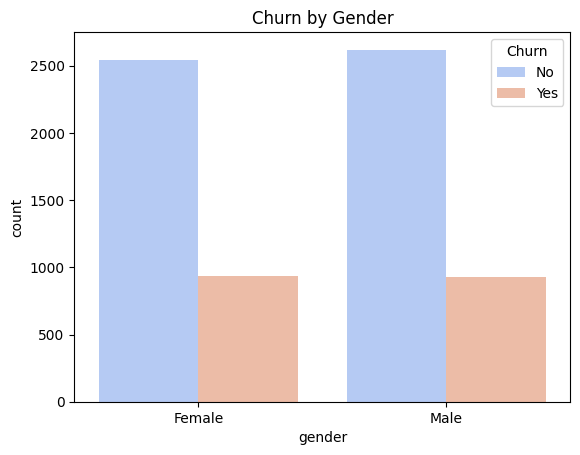

In [ ]:
sns.countplot(data=df, x='gender', hue='Churn', palette='coolwarm')
plt.title('Churn by Gender')
plt.show()

3. Churn by Internet Service

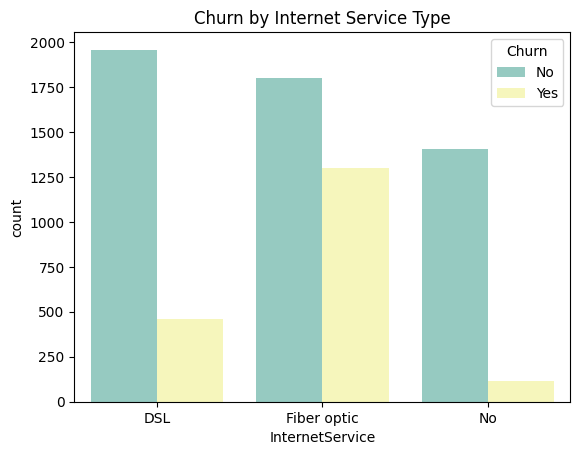

In [ ]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set3')
plt.title('Churn by Internet Service Type')
plt.show()

4. Tenure Distribution by Churn

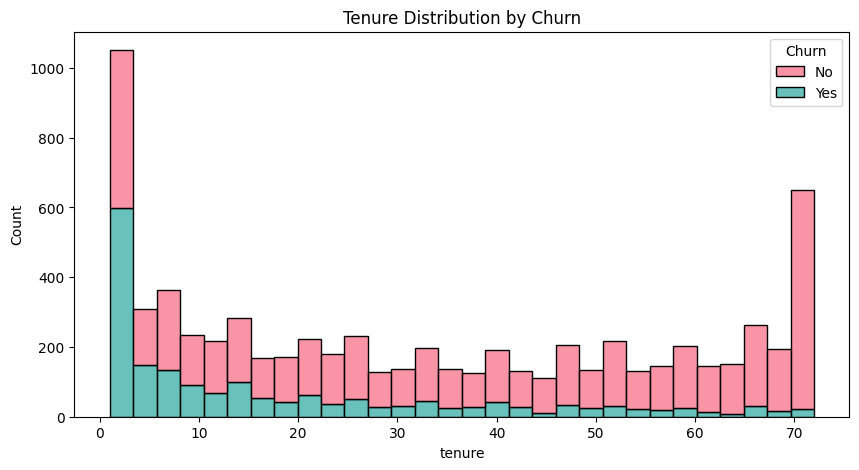

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='husl')
plt.title('Tenure Distribution by Churn')
plt.show()

5. Monthly vs Total Charges by Churn

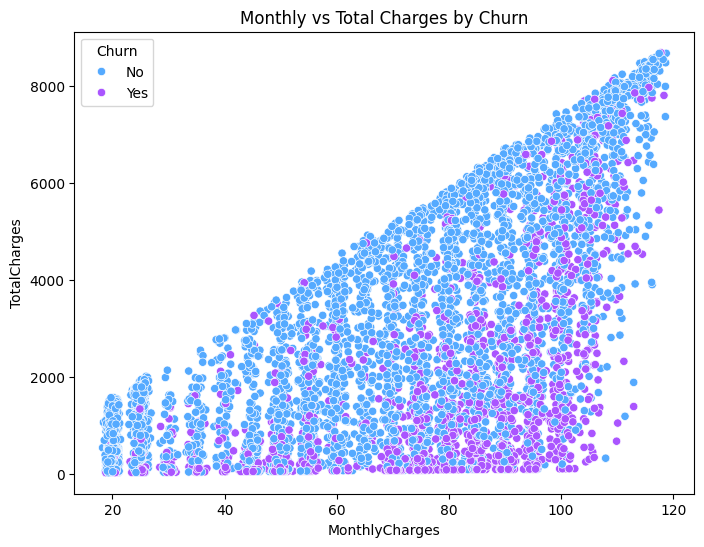

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='cool')
plt.title('Monthly vs Total Charges by Churn')
plt.show()

6. Churn by Contract Type

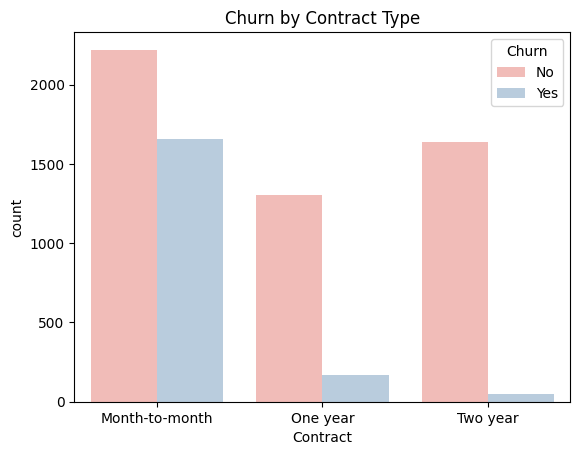

In [ ]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Pastel1')
plt.title('Churn by Contract Type')
plt.show()

7. Boxplot: Monthly Charges by Churn

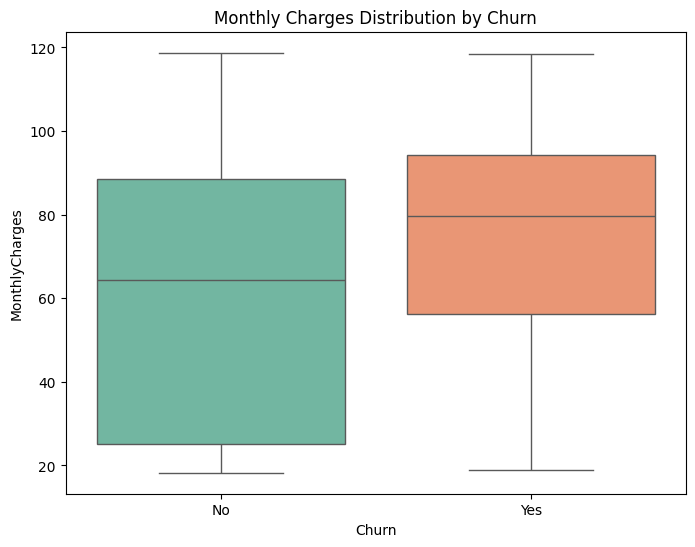

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', dodge=False)
plt.title('Monthly Charges Distribution by Churn')
plt.legend([],[], frameon=False)  # hides duplicate legend
plt.show()

8. Correlation Heatmap (Numerical Columns Only)

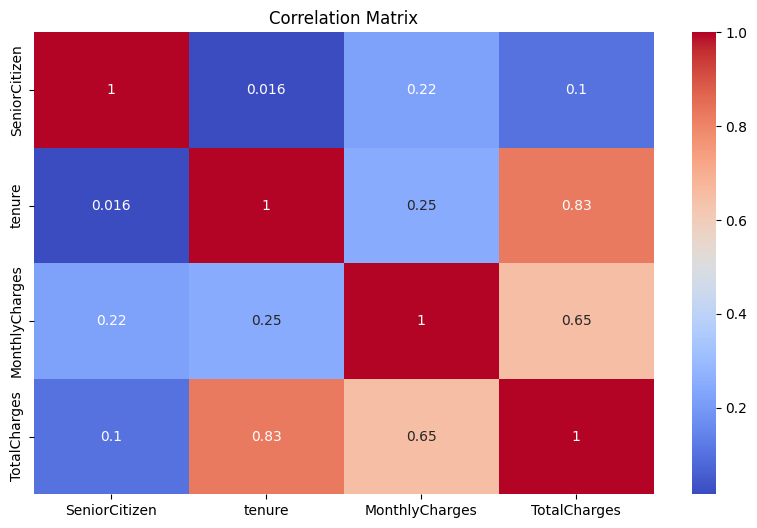

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

9.Sorting

In [7]:
# Sort by Monthly Charges (High to Low)
df_sorted = df.sort_values(by='MonthlyCharges', ascending=False)
print(df_sorted[['customerID', 'MonthlyCharges', 'Churn']].head())

      customerID  MonthlyCharges Churn
4586  7569-NMZYQ          118.75    No
2115  8984-HPEMB          118.65    No
4804  5734-EJKXG          118.60    No
3894  5989-AXPUC          118.60    No
5127  8199-ZLLSA          118.35   Yes


10.Filtering

In [8]:
# Filter customers who churned and had tenure less than 12 months
churned_early = df[(df['Churn'] == 'Yes') & (df['tenure'] < 12)]
print(churned_early[['customerID', 'tenure', 'Churn']].head())

    customerID  tenure Churn
2   3668-QPYBK       2   Yes
4   9237-HQITU       2   Yes
5   9305-CDSKC       8   Yes
18  4190-MFLUW      10   Yes
20  8779-QRDMV       1   Yes


11.Grouping and aggregation

In [9]:
# Average Monthly Charges grouped by InternetService type
internet_group = df.groupby('InternetService')['MonthlyCharges'].mean()
print(internet_group)

InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64


12.Value counts

In [10]:
# Count of customers who churned vs not churned
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


13.Crosstable Analysis

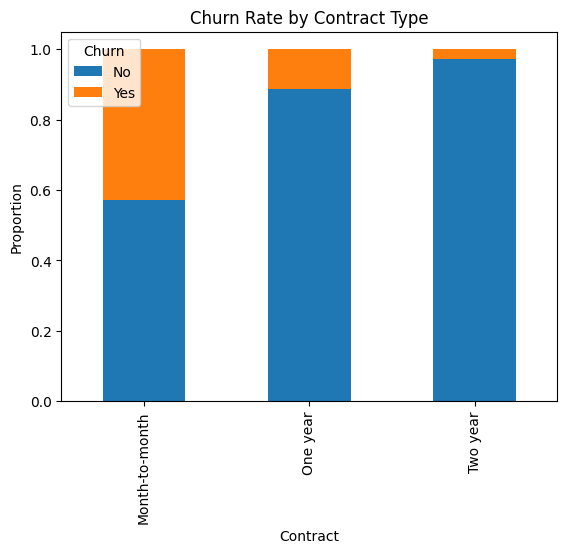

In [11]:
# Relationship between Contract type and Churn
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()

14.Histogram of Tenure

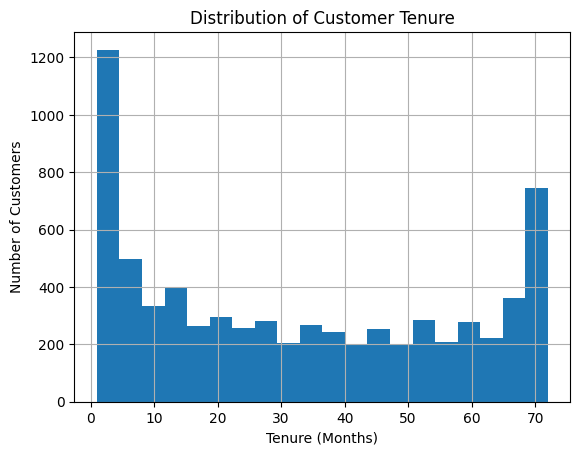

In [13]:
df['tenure'].hist(bins=20)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

15.Pie Chart of Churn

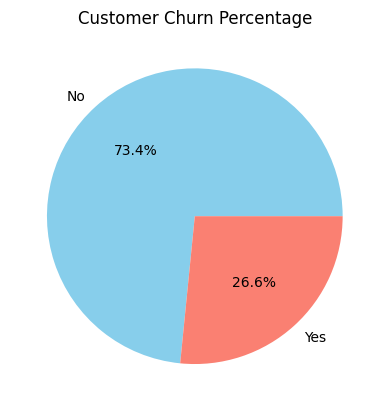

In [14]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Churn Percentage')
plt.ylabel('')
plt.show()